<a href="https://kritikseth.github.io/ipynbtagredirect" target="_parent"><img src="https://raw.githack.com/kritikseth/kritikseth/master/assets/icons/kritik_ipynbtagredirect.svg" alt="Kritik Seth"/></a>

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

# Fetch Data

In [2]:
promo = pd.read_csv('https://raw.githubusercontent.com/kritikseth/ML-Competitions/master/Mate%20Labs-%20Dockship/Data/Promotional_Data.csv')
ss = pd.read_csv('https://raw.githubusercontent.com/kritikseth/ML-Competitions/master/Mate%20Labs-%20Dockship/Data/Sample%20Submission.csv')
test = pd.read_csv('https://raw.githubusercontent.com/kritikseth/ML-Competitions/master/Mate%20Labs-%20Dockship/Data/Test.csv')
train = pd.read_csv('https://raw.githubusercontent.com/kritikseth/ML-Competitions/master/Mate%20Labs-%20Dockship/Data/Train.csv')

In [3]:
train.drop(['Secondary Sales Amount STC',
            'Secondary Sales Amount Invoiced',
            'Secondary Sales Amount Returned',
            'Secondary Sales Quantity Returned'],
             axis=1, inplace=True)

ss.drop(['Secondary Sales Amount STC',
         'Secondary Sales Amount Invoiced',
         'Secondary Sales Amount Returned',
         'Secondary Sales Quantity Returned'],
          axis=1, inplace=True)

In [4]:
train.shape, test.shape, ss.shape, promo.shape

((31285, 7), (2609, 6), (2609, 3), (962, 4))

In [5]:
test_size = test.shape[0]/(train.shape[0]+test.shape[0])

In [6]:
train.head()

,SKU Code,CFA Code,Channel,Quantity,DATE,Secondary Sales Quantity Invoiced,SKU Combination
0,8,0,1,2,2019-01-01,0.0,0
1,8,0,1,2,2019-02-01,0.0,0
2,8,0,1,2,2019-03-01,0.0,0
3,8,0,1,2,2019-04-01,192.0,0
4,8,0,1,2,2019-05-01,864.0,0


In [7]:
test.head()

,SKU Code,CFA Code,Channel,Quantity,DATE,SKU Combination
0,8,0,1,2,2020-01-01,0
1,8,0,1,2,2020-02-01,0
2,8,0,2,2,2020-01-01,1
3,8,0,2,2,2020-02-01,1
4,8,1,2,2,2020-01-01,3


In [8]:
promo.head()

,DB Channel,SKU Code,DATE,Promo
0,All,31,2018-01-01,14
1,All,32,2018-01-01,14
2,All,8,2018-01-01,14
3,All,3,2018-01-01,14
4,All,20,2018-01-01,14


In [9]:
ss.head()

,DATE,SKU Combination,Secondary Sales Quantity Invoiced
0,2020-01-01,0,0
1,2020-02-01,0,0
2,2020-01-01,1,0
3,2020-02-01,1,0
4,2020-01-01,3,0


In [10]:
train.dtypes

SKU Code                               int64
CFA Code                               int64
Channel                                int64
Quantity                               int64
DATE                                  object
Secondary Sales Quantity Invoiced    float64
SKU Combination                        int64
dtype: object

# Visualisations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4
!pip install orca
import orca
import plotly.io as pio
pio.renderers.default = 'svg'

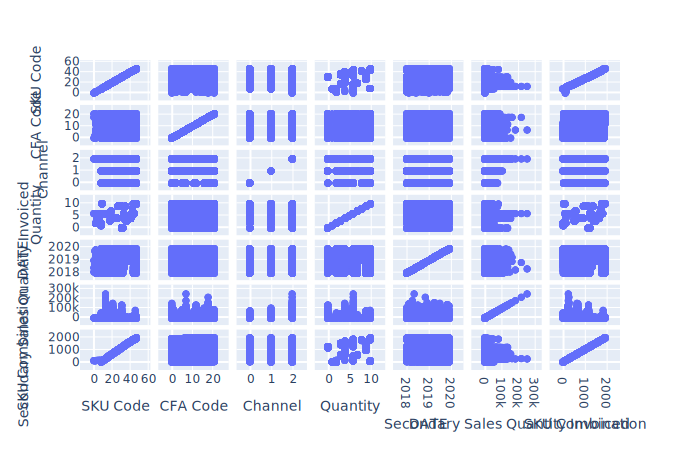

In [12]:
fig = px.scatter_matrix(train)
fig.show()

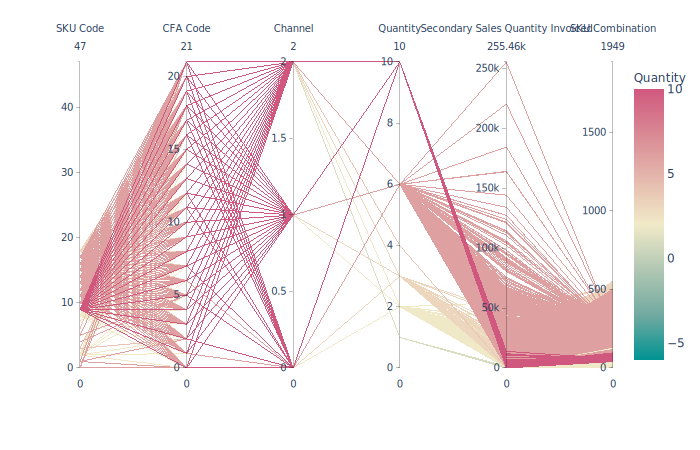

In [13]:
fig = px.parallel_coordinates(train, labels={'SKU Code': 'SKU Code',
                                             'Channel': 'Channel', 'Quantity': 'Quantity',
                                             'SKU Combination': 'SKU Combination'},
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2,
                              color='Quantity')

fig.show()

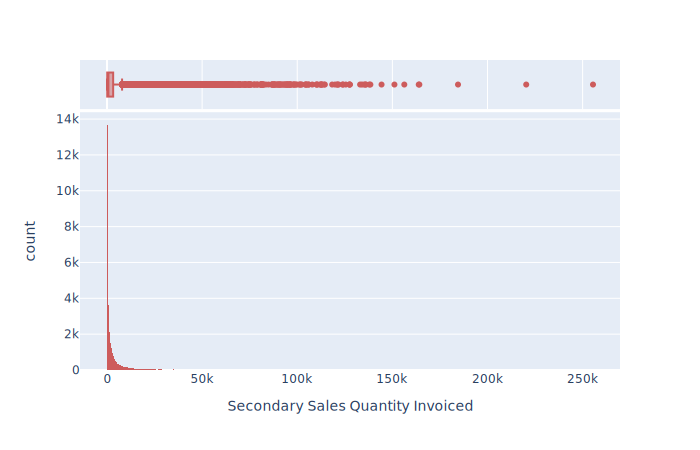

In [14]:
fig = px.histogram(train, 'Secondary Sales Quantity Invoiced',
                   color_discrete_sequence=['indianred'],
                   marginal='box')
fig.show()

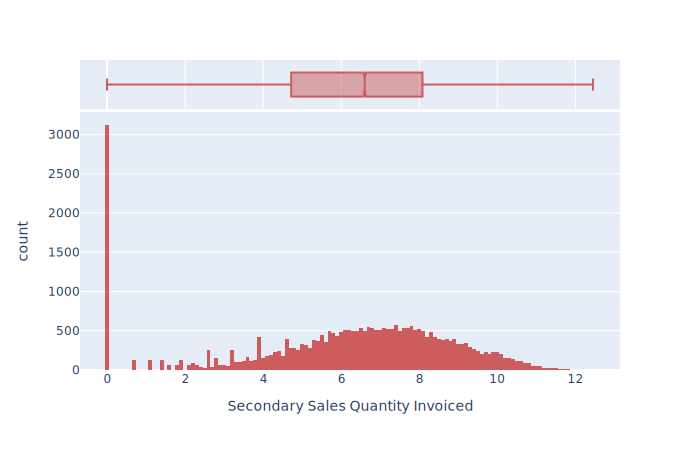

In [15]:
Ylog = np.log1p(train['Secondary Sales Quantity Invoiced'])

fig = px.histogram(Ylog, 'Secondary Sales Quantity Invoiced',
                   color_discrete_sequence=['indianred'],
                   marginal='box')
fig.show()

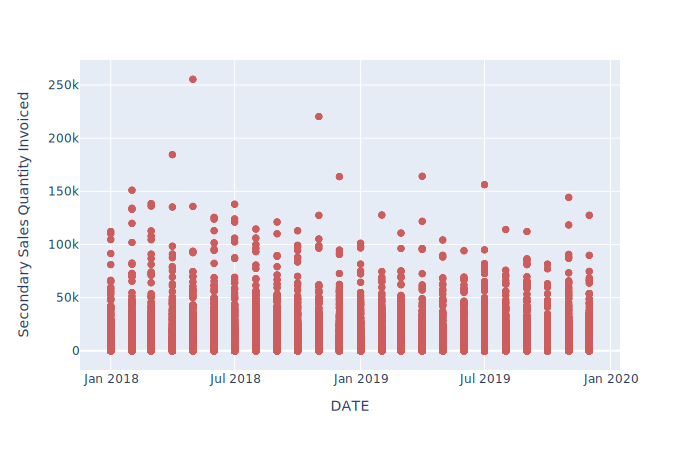

In [16]:
fig = px.scatter(train, x='DATE', y='Secondary Sales Quantity Invoiced',
                 color_discrete_sequence=['indianred'])

fig.show()

# Feature Engineering

In [17]:
import datetime as dt
from tqdm import tqdm
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [18]:
promo.drop_duplicates(inplace=True)

In [19]:
promo = pd.get_dummies(promo, columns=['DB Channel'])

In [20]:
promo13 = []
promonp = np.array(promo)

In [21]:
for i in range(len(promonp)):
    if promonp[i,0]==13 and promonp[i,5]==1:
        promo13.append(list(promonp[i,:2])+['14 & 15']+[0,1,1])

In [22]:
promo13 = pd.DataFrame(promo13, columns=promo.columns)

In [23]:
promo13.head()

,SKU Code,DATE,Promo,DB Channel_1&0 only,DB Channel_2 only,DB Channel_All
0,13,2018-01-01,14 & 15,0,1,1
1,13,2018-02-01,14 & 15,0,1,1
2,13,2018-03-01,14 & 15,0,1,1
3,13,2018-04-01,14 & 15,0,1,1
4,13,2018-05-01,14 & 15,0,1,1


In [24]:
promo = promo[promo['SKU Code']!=13]
promo = pd.concat([promo, promo13], axis=0)

In [25]:
train = pd.merge(train, promo, how='left', left_on=['SKU Code', 'DATE'], right_on=['SKU Code', 'DATE'])
test = pd.merge(test, promo, how='left', left_on=['SKU Code', 'DATE'], right_on=['SKU Code', 'DATE'])

In [26]:
train.shape, test.shape

((31285, 11), (2609, 10))

In [27]:
train.isnull().sum()

SKU Code                                0
CFA Code                                0
Channel                                 0
Quantity                                0
DATE                                    0
Secondary Sales Quantity Invoiced       0
SKU Combination                         0
Promo                                1459
DB Channel_1&0 only                  1459
DB Channel_2 only                    1459
DB Channel_All                       1459
dtype: int64

In [28]:
test.isnull().sum()

SKU Code                 0
CFA Code                 0
Channel                  0
Quantity                 0
DATE                     0
SKU Combination          0
Promo                  101
DB Channel_1&0 only    101
DB Channel_2 only      101
DB Channel_All         101
dtype: int64

In [29]:
train = train.fillna(0)
test = test.fillna(0)

In [30]:
train['Promo'] = train['Promo'].astype(str)
test['Promo'] = test['Promo'].astype(str)

In [31]:
le = LabelEncoder()

train['Promo'] = le.fit_transform(train['Promo'])
test['Promo'] = le.fit_transform(test['Promo'])

In [32]:
train['DATE'] = pd.to_datetime(train['DATE'])
test['DATE'] = pd.to_datetime(test['DATE'])

In [33]:
def create_features(df):
    df['Month'] = df['DATE'].dt.month
    df['DayOfWeek'] = df['DATE'].dt.dayofweek
    df['DayOfYear'] = df['DATE'].dt.dayofyear
    df['Quarter'] = df['DATE'].dt.quarter
    df['WeekOfYear'] = df['DATE'].dt.weekofyear
    return df

train = create_features(train)
test = create_features(test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [34]:
train['DATE'] = pd.to_datetime(train['DATE'])
test['DATE'] = pd.to_datetime(test['DATE'])

In [35]:
test['DATE'] = test['DATE'].dt.strftime("%Y%m%d").astype(int)
train['DATE'] = train['DATE'].dt.strftime("%Y%m%d").astype(int)

In [36]:
float_dtype = ['DB Channel_1&0 only','DB Channel_2 only','DB Channel_All']
for col in float_dtype:
    train[col] = train[col].astype(int)
    test[col] = test[col].astype(int)

In [37]:
train = pd.get_dummies(train, columns=['Channel'])
test = pd.get_dummies(test, columns=['Channel'])

In [38]:
def sku_code_bin_fn(row):
    if row['SKU Code'] in [31,32,8,2,7]:
        return 0
    if row['SKU Code'] in [18,36,37,38,39]:
        return 1
    if row['SKU Code'] in [3,6,20,21,22,23,24,25,26,34,40,41]:
        return 2
    if row['SKU Code'] in [0,1,4,5,10,11,12,13,14,15,16,17,33,42,45]:
        return 3
    if row['SKU Code'] in [19,43,27,28,29,30,35]:
        return 4
    else:
        return 5
    
train = train.assign(SKU_Code_Bin = train.apply(sku_code_bin_fn,axis=1))
test = test.assign(SKU_Code_Bin = test.apply(sku_code_bin_fn,axis=1))

In [39]:
# SKU Combination
Quantity_per_SKU_Comb = dict(train.groupby(['SKU Combination'])['Quantity'].agg(np.mean))
train['Quantity_per_SKU_Comb'] = train['SKU Combination']
train['Quantity_per_SKU_Comb'] = train['Quantity_per_SKU_Comb'].replace(Quantity_per_SKU_Comb)

Quantity_per_SKU_Comb = dict(test.groupby(['SKU Combination'])['Quantity'].agg(np.mean))
test['Quantity_per_SKU_Comb'] = test['SKU Combination']
test['Quantity_per_SKU_Comb'] = test['Quantity_per_SKU_Comb'].replace(Quantity_per_SKU_Comb)


# SKU Code
Quantity_per_SKU_Code = dict(train.groupby(['SKU Code'])['Quantity'].agg(np.mean))
train['Quantity_per_SKU_Code'] = train['SKU Code']
train['Quantity_per_SKU_Code'] = train['Quantity_per_SKU_Code'].replace(Quantity_per_SKU_Code)

Quantity_per_SKU_Code = dict(test.groupby(['SKU Code'])['Quantity'].agg(np.mean))
test['Quantity_per_SKU_Code'] = test['SKU Code']
test['Quantity_per_SKU_Code'] = test['Quantity_per_SKU_Code'].replace(Quantity_per_SKU_Code)


# CFA Code
Quantity_per_CFA_Code = dict(train.groupby(['CFA Code'])['Quantity'].agg(np.mean))
train['Quantity_per_CFA_Code'] = train['CFA Code']
train['Quantity_per_CFA_Code'] = train['Quantity_per_CFA_Code'].replace(Quantity_per_CFA_Code)

Quantity_per_CFA_Code = dict(test.groupby(['CFA Code'])['Quantity'].agg(np.mean))
test['Quantity_per_CFA_Code'] = test['CFA Code']
test['Quantity_per_CFA_Code'] = test['Quantity_per_CFA_Code'].replace(Quantity_per_CFA_Code)


# Promo
Quantity_per_Promo = dict(train.groupby(['Promo'])['Quantity'].agg(np.mean))
train['Quantity_per_Promo'] = train['Promo']
train['Quantity_per_Promo'] = train['Quantity_per_Promo'].replace(Quantity_per_Promo)

Quantity_per_Promo = dict(test.groupby(['Promo'])['Quantity'].agg(np.mean))
test['Quantity_per_Promo'] = test['Promo']
test['Quantity_per_Promo'] = test['Quantity_per_Promo'].replace(Quantity_per_Promo)


# DB Channel_1&0 only
Quantity_per_DB10 = dict(train.groupby(['DB Channel_1&0 only'])['Quantity'].agg(np.mean))
train['Quantity_per_DB10'] = train['DB Channel_1&0 only']
train['Quantity_per_DB10'] = train['Quantity_per_DB10'].replace(Quantity_per_DB10)

Quantity_per_DB10 = dict(test.groupby(['DB Channel_1&0 only'])['Quantity'].agg(np.mean))
test['Quantity_per_DB10'] = test['DB Channel_1&0 only']
test['Quantity_per_DB10'] = test['Quantity_per_DB10'].replace(Quantity_per_DB10)


# DB Channel_2 only
Quantity_per_DB2 = dict(train.groupby(['DB Channel_2 only'])['Quantity'].agg(np.mean))
train['Quantity_per_DB2'] = train['DB Channel_2 only']
train['Quantity_per_DB2'] = train['Quantity_per_DB2'].replace(Quantity_per_DB2)

Quantity_per_DB2 = dict(test.groupby(['DB Channel_2 only'])['Quantity'].agg(np.mean))
test['Quantity_per_DB2'] = test['DB Channel_2 only']
test['Quantity_per_DB2'] = test['Quantity_per_DB2'].replace(Quantity_per_DB2)


# DB Channel_All
Quantity_per_DBA = dict(train.groupby(['DB Channel_All'])['Quantity'].agg(np.mean))
train['Quantity_per_DBA'] = train['DB Channel_All']
train['Quantity_per_DBA'] = train['Quantity_per_DBA'].replace(Quantity_per_DBA)

Quantity_per_DBA = dict(test.groupby(['DB Channel_All'])['Quantity'].agg(np.mean))
test['Quantity_per_DBA'] = test['DB Channel_All']
test['Quantity_per_DBA'] = test['Quantity_per_DBA'].replace(Quantity_per_DBA)


# Channel_0
Quantity_per_Channel_0 = dict(train.groupby(['Channel_0'])['Quantity'].agg(np.mean))
train['Quantity_per_Channel_0'] = train['Channel_0']
train['Quantity_per_Channel_0'] = train['Quantity_per_Channel_0'].replace(Quantity_per_Channel_0)

Quantity_per_Channel_0 = dict(test.groupby(['Channel_0'])['Quantity'].agg(np.mean))
test['Quantity_per_Channel_0'] = test['Channel_0']
test['Quantity_per_Channel_0'] = test['Quantity_per_Channel_0'].replace(Quantity_per_Channel_0)


# Channel_1
Quantity_per_Channel_1 = dict(train.groupby(['Channel_1'])['Quantity'].agg(np.mean))
train['Quantity_per_Channel_1'] = train['Channel_1']
train['Quantity_per_Channel_1'] = train['Quantity_per_Channel_1'].replace(Quantity_per_Channel_1)

Quantity_per_Channel_1 = dict(test.groupby(['Channel_1'])['Quantity'].agg(np.mean))
test['Quantity_per_Channel_1'] = test['Channel_1']
test['Quantity_per_Channel_1'] = test['Quantity_per_Channel_1'].replace(Quantity_per_Channel_1)


# Channel_2
Quantity_per_Channel_2 = dict(train.groupby(['Channel_2'])['Quantity'].agg(np.mean))
train['Quantity_per_Channel_2'] = train['Channel_2']
train['Quantity_per_Channel_2'] = train['Quantity_per_Channel_0'].replace(Quantity_per_Channel_2)

Quantity_per_Channel_2 = dict(test.groupby(['Channel_2'])['Quantity'].agg(np.mean))
test['Quantity_per_Channel_2'] = test['Channel_2']
test['Quantity_per_Channel_2'] = test['Quantity_per_Channel_2'].replace(Quantity_per_Channel_2)

In [40]:
train.head()

,SKU Code,CFA Code,Quantity,DATE,Secondary Sales Quantity Invoiced,SKU Combination,Promo,DB Channel_1&0 only,DB Channel_2 only,DB Channel_All,Month,DayOfWeek,DayOfYear,Quarter,WeekOfYear,Channel_0,Channel_1,Channel_2,SKU_Code_Bin,Quantity_per_SKU_Comb,Quantity_per_SKU_Code,Quantity_per_CFA_Code,Quantity_per_Promo,Quantity_per_DB10,Quantity_per_DB2,Quantity_per_DBA,Quantity_per_Channel_0,Quantity_per_Channel_1,Quantity_per_Channel_2
0,8,0,2,20190101,0.0,0,19,0,0,1,1,1,1,1,1,0,1,0,0,2.0,1.973466,5.734012,1.974684,5.916644,5.710569,5.896687,5.654222,5.723375,5.654222
1,8,0,2,20190201,0.0,0,5,0,0,1,2,4,32,1,5,0,1,0,0,2.0,1.973466,5.734012,1.431743,5.916644,5.710569,5.896687,5.654222,5.723375,5.654222
2,8,0,2,20190301,0.0,0,5,0,0,1,3,4,60,1,9,0,1,0,0,2.0,1.973466,5.734012,1.431743,5.916644,5.710569,5.896687,5.654222,5.723375,5.654222
3,8,0,2,20190401,192.0,0,5,0,0,1,4,0,91,2,14,0,1,0,0,2.0,1.973466,5.734012,1.431743,5.916644,5.710569,5.896687,5.654222,5.723375,5.654222
4,8,0,2,20190501,864.0,0,5,0,0,1,5,2,121,2,18,0,1,0,0,2.0,1.973466,5.734012,1.431743,5.916644,5.710569,5.896687,5.654222,5.723375,5.654222


In [41]:
train.shape, test.shape

((31285, 29), (2609, 28))

In [42]:
# train['Channel_0'] = train['Channel_0'].astype(int)
# train['Channel_1'] = train['Channel_0'].astype(int)
# train['Channel_2'] = train['Channel_0'].astype(int)

In [43]:
X = train.drop(['Secondary Sales Quantity Invoiced',], axis=1)
Y = train.loc[:,['Secondary Sales Quantity Invoiced']]

In [44]:
X.shape, Y.shape, test.shape

((31285, 28), (31285, 1), (2609, 28))

# Exploratory Data Analysis

In [45]:
from sklearn.feature_selection import SelectKBest, chi2

In [46]:
def display_KBest(X, Y, score_func):
    bf = SelectKBest(score_func = chi2)
    bf.fit(X, Y)
    KBest = pd.DataFrame(list(zip(list(X.columns),list(bf.scores_))), columns=['Column Name', 'Score'])
    KBest = KBest.sort_values(by=['Score'], ascending=False)
    KBest = KBest.reset_index()
    KBest.drop(['index'], axis=1, inplace=True)
    print(KBest)

In [47]:
display_KBest(X, Y, chi2)

               Column Name         Score
0          SKU Combination  3.168492e+06
1                DayOfYear  6.116060e+05
2               WeekOfYear  8.457540e+04
3                 SKU Code  4.561559e+04
4                 CFA Code  3.702191e+04
5                    Promo  2.903952e+04
6        DB Channel_2 only  2.233848e+04
7                    Month  1.700465e+04
8                     DATE  1.405401e+04
9    Quantity_per_SKU_Comb  1.342362e+04
10   Quantity_per_SKU_Code  1.342193e+04
11                Quantity  1.341223e+04
12               DayOfWeek  1.285765e+04
13      Quantity_per_Promo  1.219505e+04
14               Channel_0  1.191991e+04
15            SKU_Code_Bin  7.115604e+03
16               Channel_2  6.529756e+03
17               Channel_1  5.849554e+03
18     DB Channel_1&0 only  5.154771e+03
19                 Quarter  4.621175e+03
20          DB Channel_All  9.122649e+02
21       Quantity_per_DB10  5.107146e+02
22        Quantity_per_DBA  3.351484e+02
23  Quantity_per

In [48]:
corr = train.corr()

In [49]:
sns_colorscale = [[0.0, '#3f7f93'], [0.071, '#5890a1'], [0.143, '#72a1b0'], [0.214, '#8cb3bf'], [0.286, '#a7c5cf'], 
                  [0.357, '#c0d6dd'], [0.429, '#dae8ec'], [0.5, '#f2f2f2'], [0.571, '#f7d7d9'], [0.643, '#f2bcc0'],
                  [0.714, '#eda3a9'], [0.786, '#e8888f'], [0.857, '#e36e76'], [0.929, '#de535e'], [1.0, '#d93a46']]

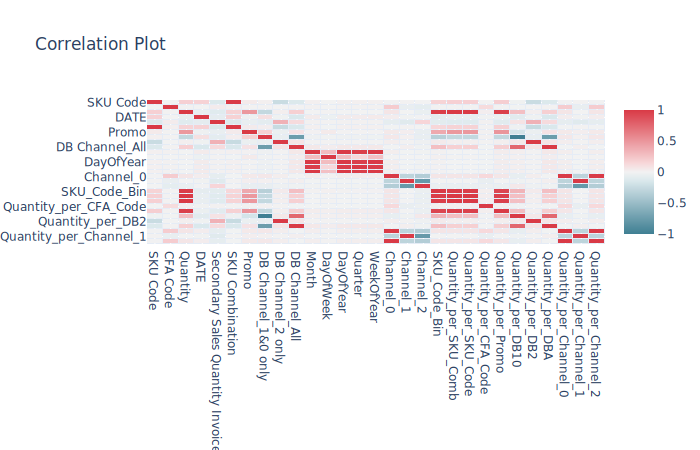

In [50]:
fig = go.Figure(data=go.Heatmap(z=corr, x=corr.columns, y=corr.columns,
                                xgap=1, ygap=1, colorscale=sns_colorscale),
                layout=go.Layout(title_text='Correlation Plot', height=1000,
                                 yaxis_autorange='reversed'))

fig.show()

In [51]:
Y_corr = corr['Secondary Sales Quantity Invoiced']
Y_corr = pd.DataFrame(Y_corr.sort_values())
Y_corr

,Secondary Sales Quantity Invoiced
SKU Combination,-0.132816
SKU Code,-0.131925
Quantity_per_Channel_1,-0.106859
Channel_1,-0.106859
Quantity_per_SKU_Comb,-0.105917
Quantity_per_SKU_Code,-0.105893
Quantity,-0.105785
Quantity_per_Promo,-0.096606
SKU_Code_Bin,-0.087503
DB Channel_1&0 only,-0.081466


In [52]:
corr_rem = ['Quantity_per_CFA_Code', 'Quarter', 'Month', 'DayOfYear',
            'WeekOfYear', 'DayOfWeek', 'Promo', 'Quantity_per_Channel_2']

kbest_rem = ['DB Channel_All', 'Quantity_per_DB10', 'Quantity_per_DBA',
             'Quantity_per_Channel_0', 'Quantity_per_Channel_2',
             'Quantity_per_DB2', 'Quantity_per_CFA_Code', 'Quantity_per_Channel_1']

rem_cols = list(set(corr_rem + kbest_rem))

In [53]:
train.drop(rem_cols, axis=1, inplace=True)
test.drop(rem_cols, axis=1, inplace=True)

In [54]:
train.shape, test.shape

((31285, 15), (2609, 14))

In [55]:
train.head()

,SKU Code,CFA Code,Quantity,DATE,Secondary Sales Quantity Invoiced,SKU Combination,DB Channel_1&0 only,DB Channel_2 only,Channel_0,Channel_1,Channel_2,SKU_Code_Bin,Quantity_per_SKU_Comb,Quantity_per_SKU_Code,Quantity_per_Promo
0,8,0,2,20190101,0.0,0,0,0,0,1,0,0,2.0,1.973466,1.974684
1,8,0,2,20190201,0.0,0,0,0,0,1,0,0,2.0,1.973466,1.431743
2,8,0,2,20190301,0.0,0,0,0,0,1,0,0,2.0,1.973466,1.431743
3,8,0,2,20190401,192.0,0,0,0,0,1,0,0,2.0,1.973466,1.431743
4,8,0,2,20190501,864.0,0,0,0,0,1,0,0,2.0,1.973466,1.431743


In [56]:
X = train.drop(['Secondary Sales Quantity Invoiced',], axis=1)
Y = train.loc[:,['Secondary Sales Quantity Invoiced']]

In [57]:
X.shape, Y.shape, test.shape

((31285, 14), (31285, 1), (2609, 14))

# Data Transformation

In [ ]:
from scipy import stats
from scipy.special import boxcox, inv_boxcox
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer

## Scaling

In [ ]:
stdsc = StandardScaler()
minmaxsc = MinMaxScaler()
robsc = RobustScaler()

In [ ]:
xcols = X.columns
testcols = test.columns
ycols = Y.columns

X = pd.DataFrame(scaler.fit_transform(X), columns=xcols)
test = pd.DataFrame(scaler.fit_transform(test), columns=testcols)
Y = pd.DataFrame(scaler.fit_transform(Y), columns=ycols)

## Transformation

### Log Transformation

In [ ]:
LOGY = np.log1p(Y)

### BoxCox Transformation

In [ ]:
Y[Y['Secondary Sales Quantity Invoiced']==0] += 1e-10

In [ ]:
BCY, fitted_lambda = boxcox(original_data)

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
test.shape[0]/(X.shape[0]+test.shape[0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)

# Check

In [58]:
X.dtypes

SKU Code                   int64
CFA Code                   int64
Quantity                   int64
DATE                       int64
SKU Combination            int64
DB Channel_1&0 only        int64
DB Channel_2 only          int64
Channel_0                  uint8
Channel_1                  uint8
Channel_2                  uint8
SKU_Code_Bin               int64
Quantity_per_SKU_Comb    float64
Quantity_per_SKU_Code    float64
Quantity_per_Promo       float64
dtype: object

# Modelling

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score

from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Lasso, ElasticNet, LinearRegression, RidgeCV

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

!pip install catboost
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

!pip install bayesian-optimization
from bayes_opt import BayesianOptimization
from mlxtend.regressor import StackingCVRegressor

!pip install vecstack
from vecstack import stacking 

!pip install pycaret
from pycaret.regression import *

## Comparing Models using CV

In [61]:
reg = setup(data = train, target = 'Secondary Sales Quantity Invoiced', numeric_features=['DB Channel_1&0 only', 'DB Channel_2 only',
                                                                                          'Channel_0', 'Channel_1', 'Channel_2', 'Quantity',
                                                                                          'SKU_Code_Bin'])

 
Setup Succesfully Completed.


,Description,Value
0,session_id,1200
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(31285, 15)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [62]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Random Forest,1344.2790,17107535.2811,4044.3612,0.8430,1.2956,4.1144,4.4120
1,CatBoost Regressor,1897.0951,18898445.1199,4267.2579,0.8257,2.5397,18.7814,4.8193
2,Extra Trees Regressor,1409.6195,19184693.8028,4275.3791,0.8236,1.1896,3.8479,3.0806
3,Light Gradient Boosting Machine,1876.2801,20836366.4299,4479.1233,0.8081,2.4050,15.5697,0.2464
4,Decision Tree,1592.3785,24603205.4713,4877.6990,0.7706,1.2321,3.1466,0.0875
5,Gradient Boosting Regressor,2844.3784,40830024.9130,6331.5307,0.6170,2.8086,31.9882,1.9015
6,Extreme Gradient Boosting,2853.5134,41116081.2340,6356.1497,0.6137,2.8056,31.7020,0.9482
7,Linear Regression,4604.1379,87317029.3946,9310.0510,0.1686,3.3845,62.1570,0.0141
8,Ridge Regression,4603.8971,87317951.2967,9310.0751,0.1686,3.3848,62.2157,0.0063
9,Bayesian Ridge,4604.2280,87322970.3566,9310.3225,0.1686,3.3858,62.3249,0.0197


## Random Forest Regressor

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
random_grid_r_1 = {'bootstrap': [True, False],
                   'max_depth': [62, 64, 66, 68, 70, 72, 74, 76, 78, None],
                   'max_features': ['auto', 'sqrt', 'log2'],
                   'min_samples_leaf': [1, 2, 3, 4, 5],
                   'min_samples_split': [1, 2, 3, 4],
                   'n_estimators': [20, 25, 30, 35, 40]}

In [ ]:
random_rfr = RandomizedSearchCV(estimator=rfr,
                                scoring='neg_root_mean_squared_error',
                                param_distributions=random_grid_r_1,
                                cv=5, verbose=2, n_jobs=-1)

In [ ]:
random_rfr.fit(X, Y.values.ravel())

In [ ]:
random_rfr.best_params_

In [ ]:
random_grid_r_2 = {'bootstrap': [True],
                   'max_depth': [42, 44, 46, 48, 50, 52, 54, 56, 58, None],
                   'max_features': ['auto'],
                   'min_samples_leaf': [1, 2, 3, 4],
                   'min_samples_split': [1, 2, 3],
                   'n_estimators': [27, 29, 31, 33, 35]}

In [ ]:
random_rfr = RandomizedSearchCV(estimator=rfr,
                                scoring='neg_root_mean_squared_error',
                                param_distributions=random_grid_r_2,
                                cv=5, verbose=2, n_jobs=-1)

In [ ]:
random_rfr.fit(X, Y.values.ravel())

In [ ]:
random_rfr.best_params_

In [ ]:
gscv_grid1 = {'bootstrap': [True],
              'max_depth': [68, 69, 70, 71, 72, None],
              'max_features': ['auto'],
              'min_samples_leaf': [1],
              'min_samples_split': [1, 2, 3],
              'n_estimators': [28, 29, 30, 31]}

In [ ]:
gscv_rfr = GridSearchCV(estimator=rfr,
                        scoring='neg_root_mean_squared_error',
                        param_grid=gscv_grid1,
                        cv=5, verbose=2, n_jobs=-1)

In [ ]:
gscv_rfr.fit(X, Y.values.ravel())

In [ ]:
gscv_rfr.best_params_

In [ ]:
rfr1 = RandomForestRegressor(n_estimators=35,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             max_features='auto',
                             max_depth=None,
                             bootstrap=True,
                             random_state=123)

In [ ]:
rfr1.fit(X, Y.values.ravel())
y_pred = rfr1.predict(test)

In [ ]:
rfr2 = RandomForestRegressor(n_estimators=27,
                             min_samples_split=2,
                             min_samples_leaf=4,
                             max_features='auto',
                             max_depth=70,
                             bootstrap=True,
                             random_state=123)

In [ ]:
rfr2.fit(X, Y.values.ravel())
y_pred = rfr2.predict(test)

In [ ]:
rfr3 = RandomForestRegressor(n_estimators=38,
                             min_samples_split=2,
                             min_samples_leaf=4,
                             max_features='auto',
                             max_depth=70,
                             bootstrap=True,
                             random_state=123)

In [ ]:
rfr3.fit(X, Y.values.ravel())
y_pred = rfr3.predict(test)

In [ ]:
# Best
rfr4 = RandomForestRegressor(n_estimators=30,
                             min_samples_split=3,
                             min_samples_leaf=1,
                             max_features='auto',
                             max_depth=None,
                             bootstrap=True,
                             random_state=123)

In [ ]:
rfr4.fit(X, Y.values.ravel())
y_pred = rfr4.predict(test)

## Extra Trees Regressor

In [ ]:
etr = ExtraTreesRegressor()

In [ ]:
random_grid_e_1 = {'bootstrap': [True, False],
                   'max_depth': [62, 64, 66, 68, 70, 72, 74, 76, 78, None],
                   'max_features': ['auto', 'sqrt', 'log2'],
                   'min_samples_leaf': [1, 2, 3, 4, 5],
                   'min_samples_split': [1, 2, 3, 4],
                   'n_estimators': [20, 25, 30, 35, 40]}

In [ ]:
random_etr = RandomizedSearchCV(estimator=etr,
                                scoring='neg_root_mean_squared_error',
                                param_distributions=random_grid_e1,
                                cv=5, verbose=2, n_jobs=-1)

In [ ]:
random_etr.fit(X, Y.values.ravel())

In [ ]:
random_etr.best_params_

In [ ]:
random_grid_e_2 = {'bootstrap': [True],
                   'max_depth': [42, 44, 46, 48, 50, 52, 54, 56, 58, None],
                   'max_features': ['auto'],
                   'min_samples_leaf': [1, 2, 3, 4],
                   'min_samples_split': [1, 2, 3],
                   'n_estimators': [27, 29, 31, 33, 35]}

In [ ]:
random_etr = RandomizedSearchCV(estimator=etr,
                                scoring='neg_root_mean_squared_error',
                                param_distributions=random_grid_e_2,
                                cv=5, verbose=2, n_jobs=-1)

In [ ]:
random_etr.fit(X, Y.values.ravel())

In [ ]:
random_etr.best_params_

In [ ]:
gscv_grid1 = {'bootstrap': [True],
              'max_depth': [68, 69, 70, 71, 72, None],
              'max_features': ['auto'],
              'min_samples_leaf': [1],
              'min_samples_split': [1, 2, 3],
              'n_estimators': [28, 29, 30, 31]}

In [ ]:
gscv_etr = GridSearchCV(estimator=etr,
                        scoring='neg_root_mean_squared_error',
                        param_grid=gscv_grid1,
                        cv=5, verbose=2, n_jobs=-1)

In [ ]:
gscv_etr.fit(X, Y.values.ravel())

In [ ]:
gscv_etr.best_params_

In [ ]:
etr1 = ExtraTreesRegressor(n_estimators=34,
                           min_samples_split=2,
                           min_samples_leaf=1,
                           max_features='auto',
                           max_depth=None,
                           bootstrap=True,
                           random_state=123)

In [ ]:
etr1.fit(X, Y.values.ravel())
y_pred = etr1.predict(test)

In [ ]:
etr2 = ExtraTreesRegressor(n_estimators=29,
                           min_samples_split=3,
                           min_samples_leaf=1,
                           max_features='auto',
                           max_depth=None,
                           bootstrap=True,
                           random_state=123)

In [ ]:
etr2.fit(X, Y.values.ravel())
y_pred = etr2.predict(test)

## Decision Tree Regressor

In [ ]:
dtr = DecisionTreeRegressor()

In [ ]:
gscv_grid1 = {'bootstrap': [True],
              'max_depth': [68, 69, 70, 71, 72, None],
              'max_features': ['auto'],
              'min_samples_leaf': [1],
              'min_samples_split': [1, 2, 3],
              'n_estimators': [28, 29, 30, 31]}

In [ ]:
gscv_dtr = GridSearchCV(estimator=dtr,
                        scoring='neg_root_mean_squared_error',
                        param_grid=gscv_grid1,
                        cv=5, verbose=2, n_jobs=-1)

In [ ]:
gscv_dtr.fit(X, Y.values.ravel())

In [ ]:
gscv_dtr.best_params_

In [ ]:
dtr1 = DecisionTreeRegressor(min_samples_split=2,
                             min_samples_leaf=3,
                             max_features='auto',
                             max_depth=40,
                             random_state=123)

In [ ]:
dtr1.fit(X, Y.values.ravel())
y_pred = dtr1.predict(test)

## Neural Network

In [ ]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
model = Sequential()

model.add(Dense(units=200, activation='tanh', input_dim=X.shape[1]))
model.add(Dense(units=400))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(units=600, activation='tanh'))
model.add(Dense(units=200, activation='tanh'))
model.add(Dense(units=1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 200)               3000      
_________________________________________________________________
dense_6 (Dense)              (None, 400)               80400     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 400)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 600)               240600    
_________________________________________________________________
dense_8 (Dense)              (None, 200)               120200    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 201       
Total params: 444,401
Trainable params: 444,401
Non-trainable params: 0
________________________________________________

In [ ]:
filepath = 'weight-best-{root_mean_squared_error:.3f}.hdf5'

checkpoint = ModelCheckpoint(filepath, monitor = 'root_mean_squared_error', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1, min_delta=100)

callbacks = [checkpoint, es]

In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
model.fit(X, Y.values.ravel(),
          validation_split=test_size, epochs=50,
          batch_size=100, callbacks=callbacks)

# Feature Selection

In [ ]:
!pip install rfpimp
from rfpimp import permutation_importances

In [64]:
def RMSE_pred(rfr, X, Y):
    return mean_squared_error(Y, rfr.predict(X), squared=False)

def RMSE(Y, Y_pred):
    return mean_squared_error(Y, Y_pred, squared=False)

In [68]:
perm_imp_rfpimp = permutation_importances(rfr, X, Y, RMSE_pred)

fig = px.histogram(x=X.columns, y=perm_imp_rfpimp)
fig.show()

In [69]:
fig = px.histogram(x=X.columns, y=rfr.feature_importances_)
fig.show()

In [70]:
rem_cols = ['Channel_0', 'Channel_1', 'SKU Code', 'Quantity',
            'DB Channel_1&0 only', 'SKU_Code_Bin', 'Quantity_per_SKU_Comb',
            'Quantity_per_SKU_Code', 'Quantity_per_Promo']

In [71]:
train.drop(rem_cols, axis=1, inplace=True)
test.drop(rem_cols, axis=1, inplace=True)

In [72]:
X = train.drop(['Secondary Sales Quantity Invoiced',], axis=1)
Y = train.loc[:,['Secondary Sales Quantity Invoiced']]

In [73]:
X.columns

Index(['CFA Code', 'DATE', 'SKU Combination', 'DB Channel_2 only',
       'Channel_2'],
      dtype='object')

# Compare with Best Model

In [74]:
def compare_best(best_pred, y_pred):
    RMSE = mean_squared_error(best_pred, y_pred, squared=False)
    print(f'RMSE: {RMSE}\nMax Value Best: {np.max(best_pred)}\tMax Value Current: {np.max(y_pred)}')
    print('Top 5 Rows')
    print(pd.DataFrame(y_pred).head())

def compare_best_pred(best_pred, model, X, Y, test):
    model.fit(X, Y.values.ravel())
    y_pred = model.predict(test)
    compare_best(best_pred, y_pred)

In [78]:
y_pred_best = y_pred

In [ ]:
compare_best(y_pred_best, y_pred)

# New (Train + Test) Data

In [79]:
def XY_on_full_data(train, test, y_pred):
    test['Secondary Sales Quantity Invoiced'] = y_pred
    df = pd.concat([train,test])
    X = df.drop(['Secondary Sales Quantity Invoiced',], axis=1)
    Y = df.loc[:,['Secondary Sales Quantity Invoiced']]
    return (X, Y)

def predict_on_full(train, test, model):
    X = train.drop(['Secondary Sales Quantity Invoiced',], axis=1)
    Y = train.loc[:,['Secondary Sales Quantity Invoiced']]
    
    model.fit(X, Y.values.ravel())
    y_pred = model.predict(test)

    X, Y = XY_on_full_data(train, test, y_pred)

    model.fit(X, Y.values.ravel())
    test.drop(['Secondary Sales Quantity Invoiced'], axis=1, inplace=True)
    y_pred = model.predict(test)

    return y_pred

# Final Model Tuning


In [65]:
rfr = RandomForestRegressor(n_estimators=30,
                            min_samples_split=3,
                            min_samples_leaf=1,
                            max_features='auto',
                            max_depth=None,
                            bootstrap=True,
                            random_state=123)

In [76]:
rfr.fit(X, Y.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [77]:
y_pred = rfr.predict(test)

In [80]:
y_pred = predict_on_full(train, test, rfr)

In [ ]:
# y_pred_best = y_pred

In [81]:
compare_best(y_pred_best, y_pred)

RMSE: 236.7533331151832
Max Value Best: 116865.14444444445	Max Value Current: 119912.36970370366
Top 5 Rows
              0
0     13.950556
1     13.950556
2  27044.636362
3  27044.636362
4  10709.663801


# Inverse Transform Predictions

### Inverse Scaling

In [ ]:
y_pred = stdsc.inverse_transform(y_pred)

### Inverse Log

In [ ]:
y_pred = np.expm1(y_pred)

### Inverse BoxCox

In [ ]:
y_pred = inv_boxcox(y_pred, fitted_lambda)

# Sample Submission

In [82]:
from google.colab import files

In [83]:
ss['Secondary Sales Quantity Invoiced'] = y_pred
ss.to_csv('submission.csv', index=False)

In [84]:
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>